In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [57]:
import numpy as np
from functions import CFloader, splt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import sqrt

savedir = "B01/"

In [64]:
# data = CFloader.load_data( "CloudVenetoAnalysis/default_20220514" )
data = CFloader.load_data( "AcerAnalysis/default_20220514_3" )
fitlim = 1e3

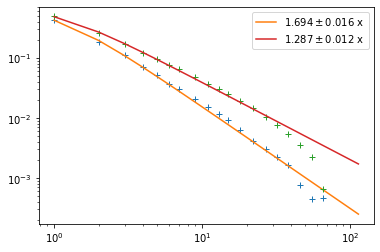

In [65]:
for d in data:
    x = np.array( d['CF_D']['x'] )
    y = np.array( d['CF_D']['y'] )
    plt.plot( x,  y, '+' )

    def f( x, A, gamma ):
        return A * ( 1 + x**2 ) ** ( - gamma / 2 )
    p, pc = curve_fit( f, x[ x < fitlim ], y[ x < fitlim ], [ y[0], 0.2 ] )
    y2 = f( x, p[0], p[1] )
    compat = ( abs( p[1] - d['gamma'] ) < 3 * sqrt( pc[1,1] ) )

    plt.plot( x, y2, label = fr"${p[1]:.3f} \pm {sqrt(pc[1,1]):.3f}$ {'✓' if compat else 'x'}" ) 
    plt.xscale( 'log' )
    plt.yscale( 'log' )
    plt.legend()

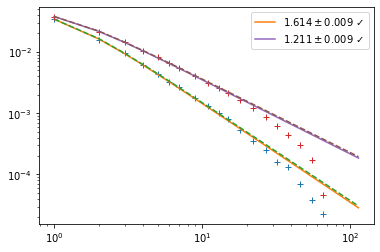

In [66]:
for d in data:
    x = np.array( d['CF_H']['x'] )
    y = np.array( d['CF_H']['y'] )
    plt.plot( x,  y, '+' )

    def f( x, A, gamma ):
        return A * ( 1 + x**2 ) ** ( - gamma / 2 )
    p, pc = curve_fit( f, x[ x < fitlim ], y[ x < fitlim ], [ y[0], 0.2 ] )
    y2 = f( x, p[0], p[1] )
    compat = ( abs( p[1] - d['gamma'] ) < 3 * sqrt( pc[1,1] ) )

    plt.plot( x, y2, label = fr"${p[1]:.3f} \pm {sqrt(pc[1,1]):.3f}$ {'✓' if compat else 'x'}" ) 
    plt.plot( x, f( x, p[0], d['gamma'] ), '--' ) 
    plt.xscale( 'log' )
    plt.yscale( 'log' )
    plt.legend()